## Breast Cancer Detection with logistic Regression


In [ ]:
import numpy as np
import sklearn.datasets

In [ ]:
breast_cancer=sklearn.datasets.load_breast_cancer()
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
X=breast_cancer.data
Y=breast_cancer.target
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [ ]:
#import data to pandas dataframe
import pandas as pd
data=pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class']=breast_cancer.target
data.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [ ]:
print(breast_cancer.target_names)
#0-malignant, 1-benign

['malignant' 'benign']


In [ ]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
from sklearn.model_selection import train_test_split
#stratify used to make distribution of 0 and 1 almost same,splitiing data correctly

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(569,) (512,) (57,)


In [ ]:
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [ ]:
print(X.mean(),X_train.mean(),X_test.mean())

61.890712339519624 61.31637960106119 67.04963097269005


In [ ]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[1.490e+01 2.253e+01 1.021e+02 ... 2.475e-01 2.866e-01 1.155e-01]
 [1.205e+01 1.463e+01 7.804e+01 ... 6.548e-02 2.747e-01 8.301e-02]
 [1.311e+01 1.556e+01 8.721e+01 ... 1.986e-01 3.147e-01 1.405e-01]
 ...
 [1.258e+01 1.840e+01 7.983e+01 ... 8.772e-03 2.505e-01 6.431e-02]
 [1.349e+01 2.230e+01 8.691e+01 ... 1.282e-01 2.871e-01 6.917e-02]
 [1.919e+01 1.594e+01 1.263e+02 ... 1.777e-01 2.443e-01 6.251e-02]]
[0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()


In [ ]:
classifier.fit(X_train,Y_train)
from sklearn.metrics import accuracy_score
prediction=classifier.predict(X_train)
accuracy=accuracy_score(Y_train,prediction)

print(accuracy)

0.951171875


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
pred=classifier.predict(X_test)
accuracy=accuracy_score(Y_test,pred)
print(accuracy)

0.9298245614035088


In [ ]:
#detecting whether person has breast cancer benign or malignant
input_data=(17.462830, 21.604906,	115.365377,	978.376415,	0.102898,	0.145188,	0.160775,	0.087990,	0.192909,	0.062680,	0.609083,	1.210915,	4.323929,	72.672406,	0.006780,	0.032281,	0.041824,	0.015060	,0.020472,	0.004062,	21.134811,	29.318208,	141.370330,	1422.286321,	0.144845,	0.374824,	0.450606,	0.182237,	0.323468,	0.09153)
input_data_as_array=np.asarray(input_data)
print(input_data)
input_data_reshape=input_data_as_array.reshape(1,-1)
print(input_data_as_array)
print(input_data_reshape)


(17.46283, 21.604906, 115.365377, 978.376415, 0.102898, 0.145188, 0.160775, 0.08799, 0.192909, 0.06268, 0.609083, 1.210915, 4.323929, 72.672406, 0.00678, 0.032281, 0.041824, 0.01506, 0.020472, 0.004062, 21.134811, 29.318208, 141.37033, 1422.286321, 0.144845, 0.374824, 0.450606, 0.182237, 0.323468, 0.09153)
[1.74628300e+01 2.16049060e+01 1.15365377e+02 9.78376415e+02
 1.02898000e-01 1.45188000e-01 1.60775000e-01 8.79900000e-02
 1.92909000e-01 6.26800000e-02 6.09083000e-01 1.21091500e+00
 4.32392900e+00 7.26724060e+01 6.78000000e-03 3.22810000e-02
 4.18240000e-02 1.50600000e-02 2.04720000e-02 4.06200000e-03
 2.11348110e+01 2.93182080e+01 1.41370330e+02 1.42228632e+03
 1.44845000e-01 3.74824000e-01 4.50606000e-01 1.82237000e-01
 3.23468000e-01 9.15300000e-02]
[[1.74628300e+01 2.16049060e+01 1.15365377e+02 9.78376415e+02
  1.02898000e-01 1.45188000e-01 1.60775000e-01 8.79900000e-02
  1.92909000e-01 6.26800000e-02 6.09083000e-01 1.21091500e+00
  4.32392900e+00 7.26724060e+01 6.78000000e-03 

In [ ]:
cancer_pred=classifier.predict(input_data_reshape)
print(cancer_pred)

if cancer_pred[0]==0:
  print('The breast cancer is malignant')
else:
  print('The breast cancer is benign')

[0]
The breast cancer is malignant


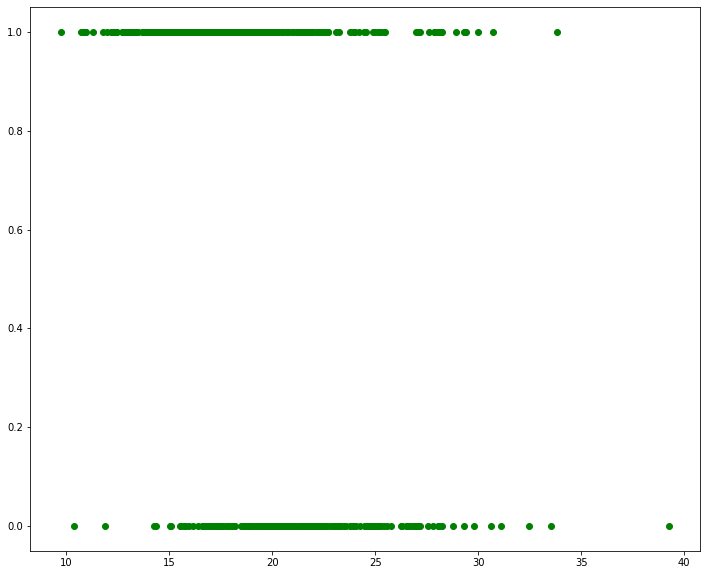

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(X[:,1],Y,color='green')
plt.show()


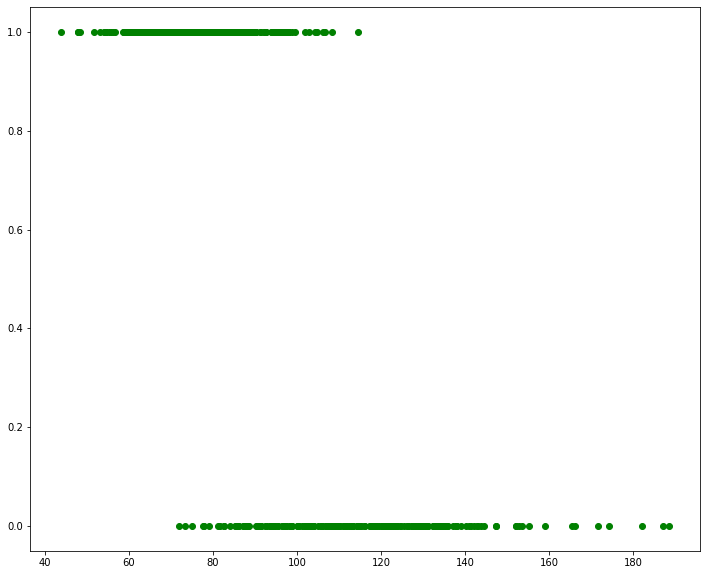

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.scatter(X[:,2],Y,color='green')
plt.show()

**KNN logistic regression algorithm**

In [ ]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train) 
knn.score(X_test,Y_test)
knn.predict([[10.462830, 11.604906,	60.365377,	300.376415,	0.1898,	0.15188,	0.10775,	0.057990,	0.192909,	0.062680,	0.109083,	0.210915,	2.323929,	22.672406,	0.006780,	0.032281,	0.011824,	0.015060	,0.020472,	0.004062,	11.134811,	9.318208,	14.370330,	1422.286321,	0.144845,	0.374824,	0.450606,	0.182237,	0.323468,	0.09153]])
knn.predict([[12.146524,	17.914762	,78.075406	,462.790196	,0.092478,	0.080085,	0.046058,	0.025717,	0.174186	,0.062867	,0.284082,	1.220380,	2.000321,	21.135148,	0.007196,	0.021438	,0.025997,	0.009858,	0.020584,	0.003636,	13.379801	,23.515070,	87.005938,	558.899440,	0.124959,	0.182673,	0.166238,	0.074444,	0.270246,	0.079442]])

array([1])

In [ ]:
from sklearn.metrics import accuracy_score
pred1=knn.predict(X_train)
accuracy=accuracy_score(Y_train,pred1)

print(accuracy)

pred2=knn.predict(X_test)
accuracy=accuracy_score(Y_test,pred2)
print(accuracy)

0.94921875
0.9298245614035088


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[19,  2],
       [ 2, 34]])

Text(42.0, 0.5, 'Truth')

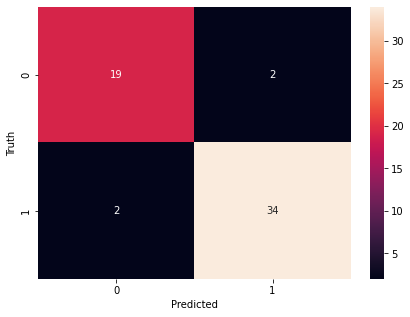

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
##SVM
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(X_train,Y_train)

SVC()

In [ ]:
model.score(X_test,Y_test)

0.9298245614035088

In [ ]:
model.score(X_train,Y_train)

0.919921875

In [ ]:
#regularization
model_c=SVC(C=1)
model_c.fit(X_train,Y_train)
model_c.score(X_test,Y_test)




0.9298245614035088

In [ ]:
#kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, Y_train)
model_linear_kernal.score(X_test, Y_test)

0.9473684210526315

In [ ]:
#gamma
model_g = SVC(gamma=1)
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

0.631578947368421

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=20)

In [ ]:
prediction=model.predict(X_train)
accuracy=accuracy_score(Y_train,prediction)

print(accuracy)

1.0


In [ ]:
y_predicted = model.predict(X_test)
accu=accuracy_score(Y_test,y_predicted)
accu

0.9473684210526315

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[19,  2],
       [ 1, 35]])

Text(69.0, 0.5, 'Truth')

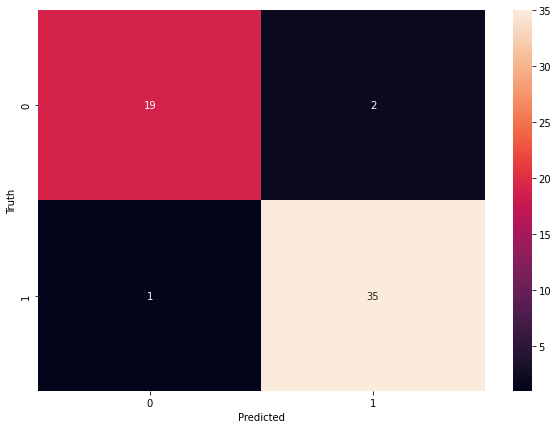

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Decision trees
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [ ]:
model.fit(X_train, Y_train)
model.score(X_train,Y_train)

1.0

In [ ]:
prediction=model.predict(X_train)
accuracy=accuracy_score(Y_train,prediction)

print(accuracy)

1.0


In [ ]:
y_predicted = model.predict(X_test)
accu=accuracy_score(Y_test,y_predicted)
accu

0.9298245614035088